In [1]:
import pandas as pd
import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt

# Model selection libraries
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Import Tensor Flow and keras
import tensorflow as tf
from tensorflow import keras

import tensorflow_hub as hub
import tensorflow_text

import joblib
import pickle

2023-04-01 16:41:29.334589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Configure Pandas to show all columns / rows
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
# Set column max width larger
pd.set_option('display.max_colwidth', 200)

In [3]:
# Load data from phishing email csv
email_df = pd.read_csv('./data/phishing_all_data_clean_4.csv')

In [4]:
X = email_df.drop(columns=['phishing'])
y = email_df.loc[:, ['phishing']]

In [5]:
X_remainder, X_test, y_remainder, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=1337,
    test_size=0.2,
)
X_remainder.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_remainder.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_remainder,
    y_remainder,
    stratify=y_remainder,
    random_state=1337,
    test_size=0.2,
)
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_validation.reset_index(drop=True, inplace=True)

In [47]:
loaded_model = keras.models.load_model(
    './models/bert_model_20_relu_sig.h5',
    custom_objects={'KerasLayer':hub.KerasLayer},
    compile=False,
)

In [48]:
loaded_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Recall()]
)

In [49]:
y_test_pred = loaded_model.predict(X_test['content'])

78/78 [==============================] - 339s 4s/step


In [50]:
y_test_bin_pred = np.where(y_test_pred >= 0.5, 1, 0)

In [51]:
accuracy_score(y_test['phishing'].values, y_test_bin_pred.flatten())

0.9669488109633212

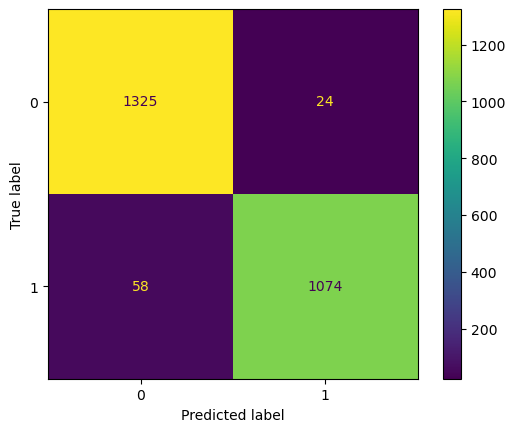

In [52]:
conf_matrix = confusion_matrix(y_test, y_test_bin_pred)
conf_disp = ConfusionMatrixDisplay(conf_matrix)
conf_disp.plot()
plt.show()

In [53]:
X_test[(y_test['phishing'].values == 1) & (y_test_bin_pred.flatten() != y_test['phishing'].values)]

,content,unsecure_link_count,secure_link_count,numbers_count,word_count
35,Hi for LESS struggle going on apparently they are the bound man to A complete corruption of history,1,0,1,18
139,DEAR SIR MA HOW ARE YOU TODAY SIR OUR NAME LIMITED WE SAW THE ABOUT YOUR UPCOMING CONFERENCE AND WE DECIDED TO CONTACT ADDRESS SIR WE WILL BE HAPPY IF YOU BACK TO US WITH THE FULL ABOUT BECAUSE WE...,0,0,4,76
189,mail it bin start target blank Sponsor virus ma non sai come i virus a virus A,1,0,15,17
207,You may or may not have of me however been marketing on the for over now and have done extremely well for myself I made over million in just a couple of of my final year of marketing which was a p...,0,0,21,543
229,Content transfer printable sent this message to Your registered name is included to show this message from Learn More click to User Agreement and Privacy Policy Dear writing to let you know that t...,7,0,49,606
345,committee representative whose name below We wait in anticipation of your operation Yours faithfully Ben DEPARTMENT OF AND OF SOUTH See their hear their laughter with Messenger messenger za,1,0,0,29
472,Please respond promptly to ensure your complete professional information is taken into consideration CONFIRM YOUR NOMINATION TODAY are selected based upon one current position and with information...,0,0,2,99
504,FROM THE DESK PROFESSOR GOVERNOR CENTRAL BANK OF STRONG,0,0,0,9
506,is this Tue yahoo ca wrote FROM PHON,0,0,11,8
595,Sun Oil Company Trusty Japan about index CASHIER am President of Japan Sun Japan Sun Oil Company is of the world renown in Japan and and are and marketing not only high but also petroleum and We s...,0,0,10,276


In [76]:
loaded_model.predict([
    '''
    Contacting you from the state department. You have won 10000 dollars. Please log in to claim your prize!
    '''
])

1/1 [==============================] - 0s 249ms/step


array([[0.9613922]], dtype=float32)